In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\Python\Heart Disease.csv')

In [3]:
df

# sex: Male=1, Female=0
# cp: Type of Chest Pain
# trestbps: Resting Blood Pressure
# Chol: Serum Cholesterol
# fbs: Fasting Blood Sugar (1=True, 0=False)
# restecg: Resting Electrocardiographic Result
# thalach: Maximum heart rate achieved
# exang: Exercise induced angina (1=Yes, 0=No)
# oldpeak: Depression induced by exercise relative to rest
# slope: Slope of the peak exercise segment (how much maximum exercise we have done)
# ca: Number of major vessels (0 to 3)
# thal: 3=Normal and 6=Fixed defect,7=Reversible defect. Thalasemia levels
# target: Having heart disease or not. 1=Yes, 0=No

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Check if the data set is balanced or not

df.target.value_counts() 

# This is balanced data set.

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

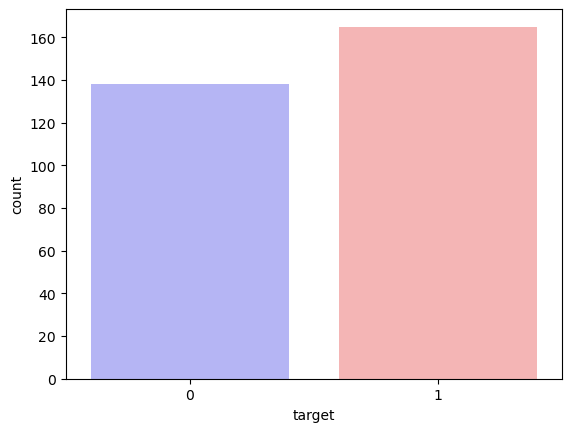

In [6]:
# Use countplot to check if the data set is balanced or not

sns.countplot(x='target',data=df , palette = 'bwr')


In [7]:
# To check how many people have heart disease and how many do not have

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

In [8]:
countNoDisease

138

In [9]:
countHaveDisease

165

In [10]:
print("no Heart Disease %: {:.2f}%".format((countNoDisease / (len(df.target))*100)))

no Heart Disease %: 45.54%


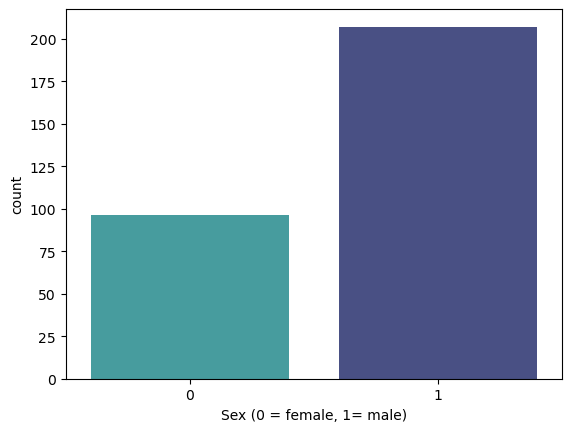

In [11]:
# Check the distribution of sex in our data set (How many Males and Females)

sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [12]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

In [13]:
countFemale

96

In [14]:
countMale

207

In [15]:
# Find % sex-Female

print("Heart Disease % Female: {:.2f}%".format((countFemale / (len(df.sex))*100)))

Heart Disease % Female: 31.68%


In [16]:
# Find % sex-Male

print("Heart Disease % Male: {:.2f}%".format((countMale / (len(df.sex))*100)))

Heart Disease % Male: 68.32%


In [17]:
# Applying the Groupby function to check the relationship of 'target' variable with the other variables in the data set

df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


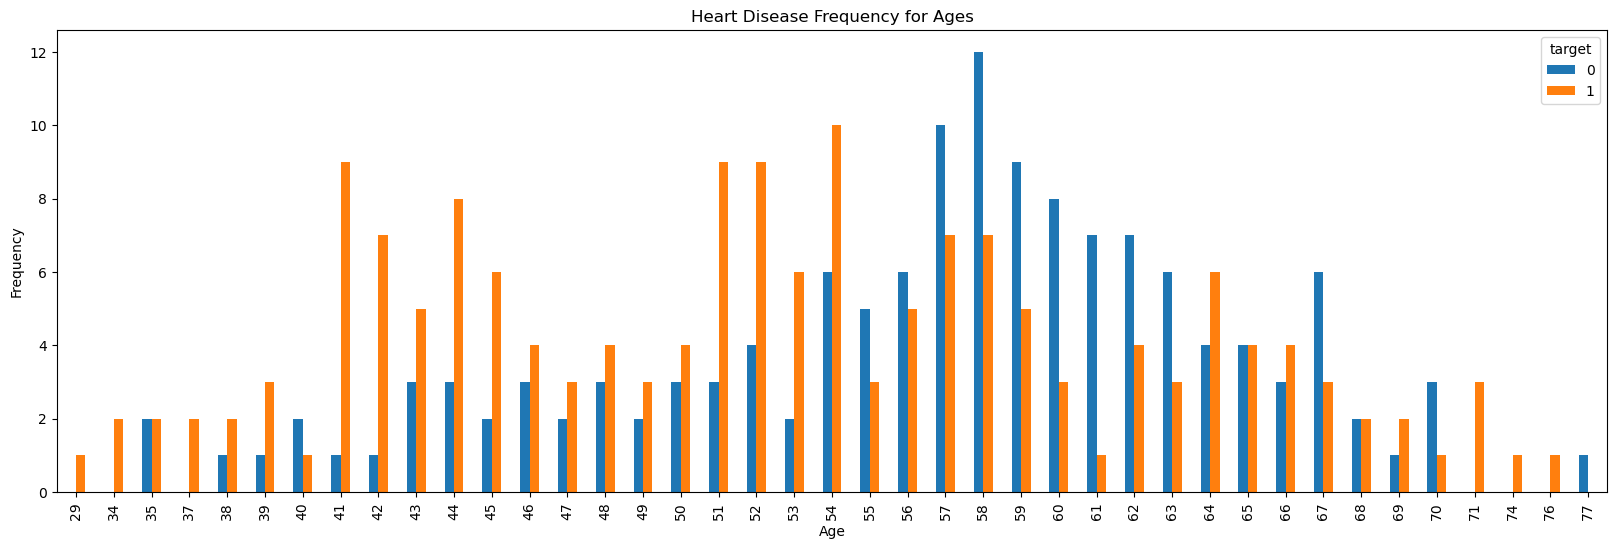

In [18]:
# To check the overall distribution of age vs target

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [19]:
pd.crosstab(df.age,df.target)

# We are creating a cross tabulation (contingency table) of 2 columns 'age'and 'target' from the data frame 'df'. It 
# calculates the frequency of each combination of 'age' and 'target' values.

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


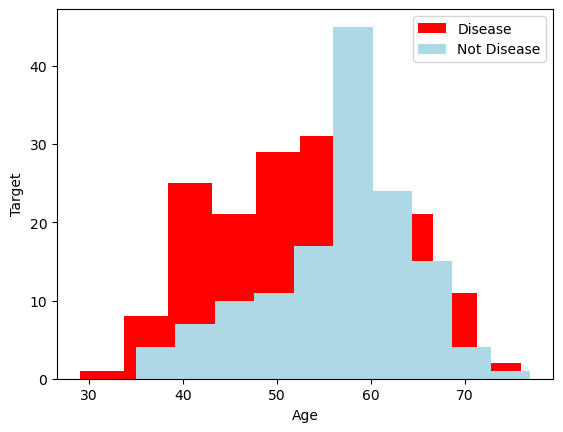

In [20]:
# Histogram of age Vs target

plt.hist(x=df.age[df.target==1],  color ="red")
plt.hist(x=df.age[df.target==0],  color ="lightblue")
#plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Target")
plt.show()

In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp', ylabel='target'>

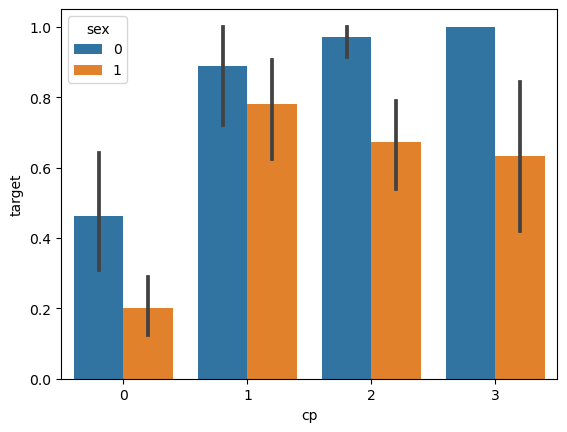

In [22]:
sns.barplot(x = df.cp, y = df.target, hue = df.sex)

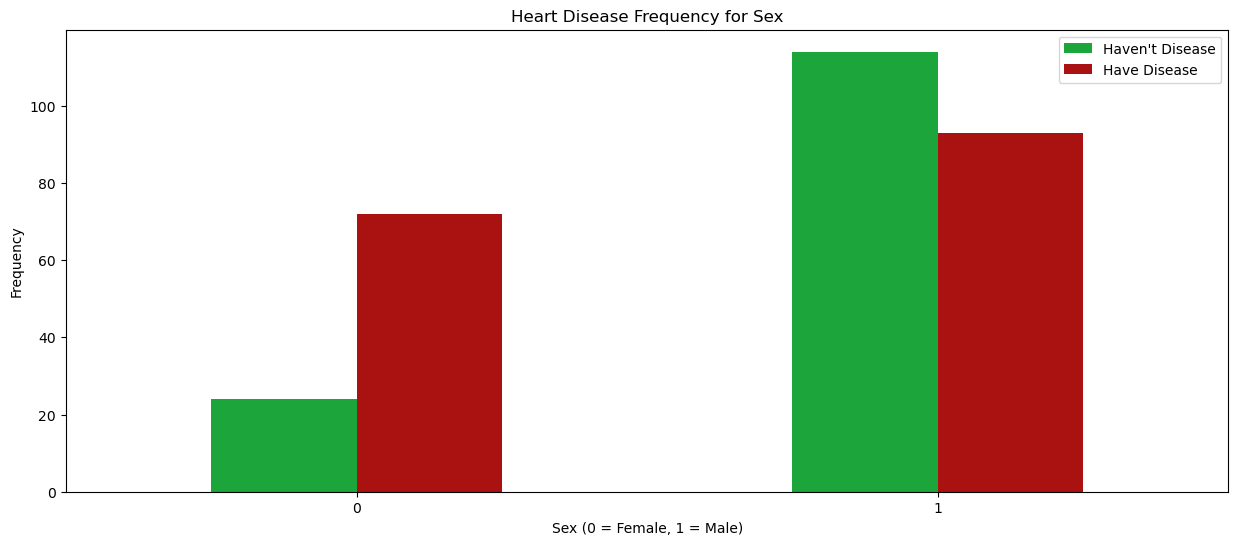

In [23]:
# Overall distribution of male and female with target (irrespective of chest pain)

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

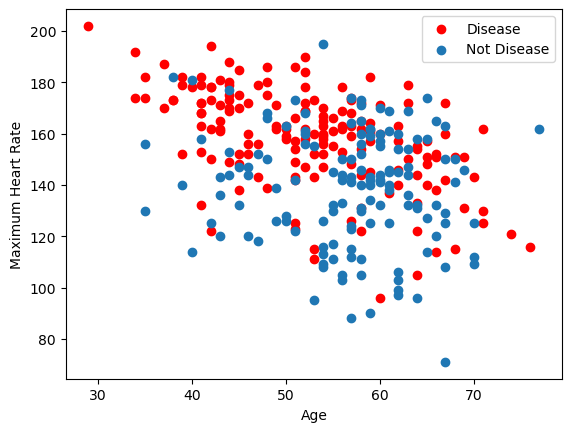

In [24]:
# age Vs thalach with respect to target

plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

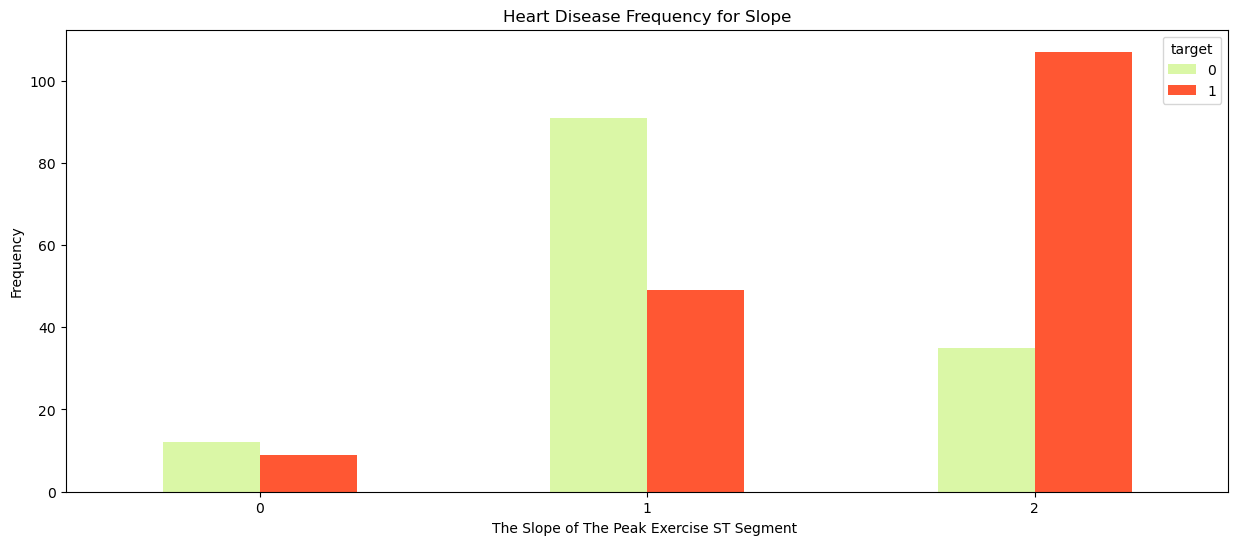

In [25]:
# slope Vs target

pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

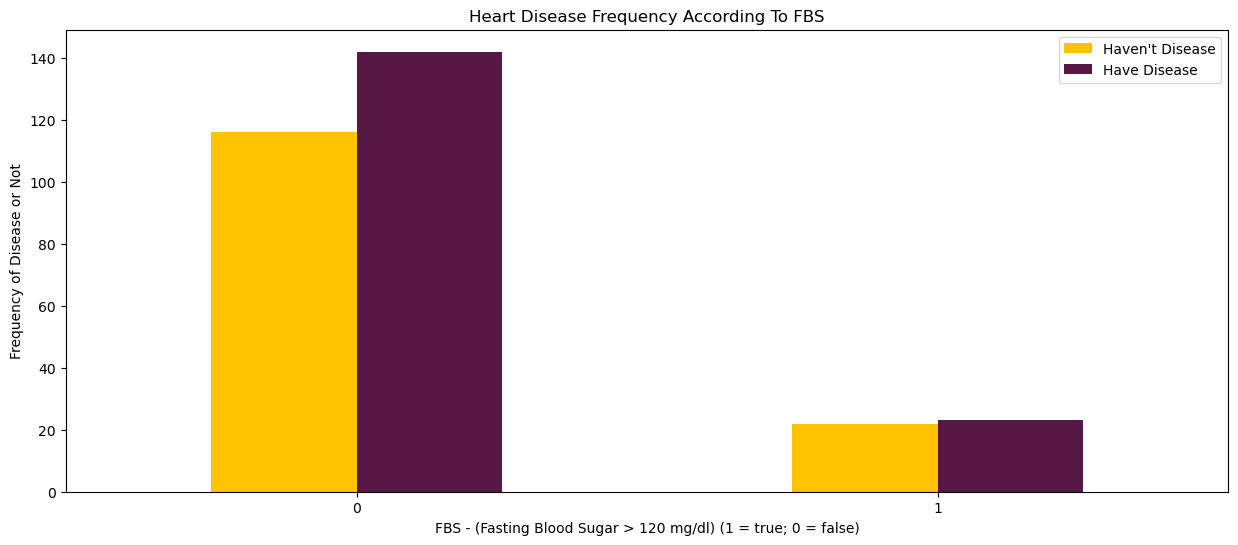

In [26]:
# Fasting sugar fbp Vs target

pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

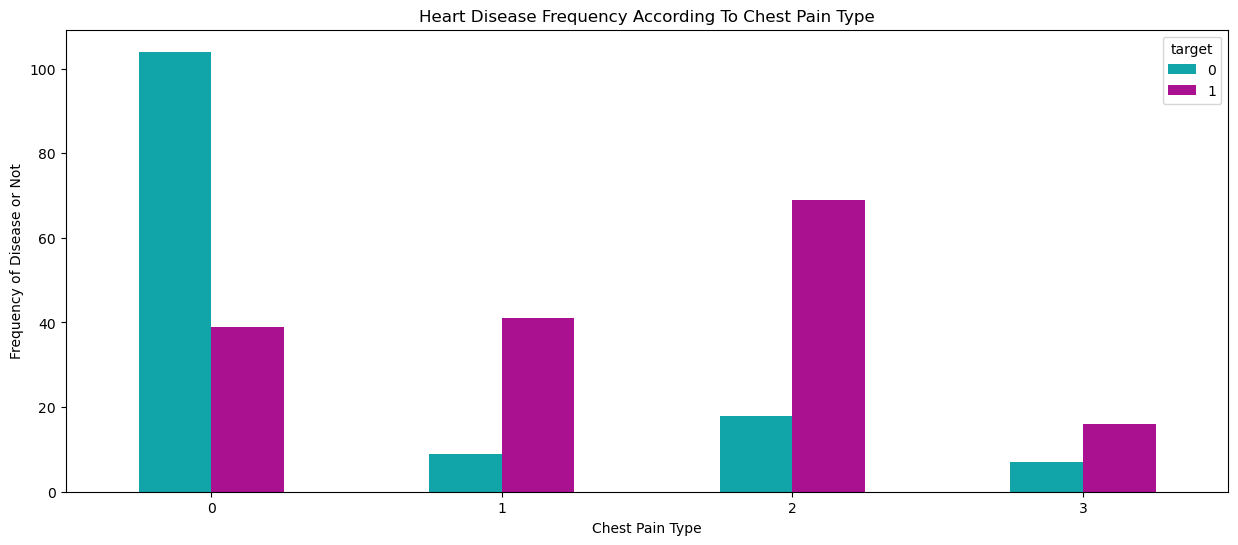

In [27]:
# cp Vs target (without considering the sex)-overall distribution

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [30]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [31]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [32]:
# Above output states, we have different indicators for each of the slope, thal and cp columns that already incorporates
# an inherent ordering. To remove that and to not make the model biased in taking the data inputs we are doing the 
# dummification by applying pd.get_dummies function.

# We are creating dummy variables for the Chest Pain type column (cp)  in the data frame. It converts the categorical values
# in the column into binary columns where each category is represented as binary variable (0 or 1).

# The prefix="cp" is added to column names for chest pain to indicate that they are derived from the 'cp' column.
# Similarly for thal and slope. 

# In ssummary, we will have additional binary columns in the data frame, each representing a category from the original
# categorical columns 'cp', 'thal' 'slope'. These dummy variables are often used in Ml models when dealing with categorical data 
# as it allows to represent categorical information in a way that can be processed by algorithms.

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [33]:
a

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [34]:
b

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [35]:
c

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [36]:
# Concatenating df and a,b,c

df = pd.concat([df, a, b, c] , axis =1 )

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_0', 'cp_1',
       'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',
       'slope_1', 'slope_2'],
      dtype='object')

In [39]:
# Remove cp, thal, slope

df.drop(['cp','thal','slope','cp_1', 'thal_0', 'slope_0'], axis=1 , inplace = True)

In [40]:
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,1,0,0,0,0,1,1,0
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,1,0,0,1,1,0
300,68,1,144,193,1,1,141,0,3.4,2,0,1,0,0,0,0,1,1,0
301,57,1,130,131,0,1,115,1,1.2,1,0,1,0,0,0,0,1,1,0


In [41]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_2', 'cp_3', 'thal_1', 'thal_2',
       'thal_3', 'slope_1', 'slope_2'],
      dtype='object')

In [42]:
# Dividing the data set in x and y

y = df.target.values
x_data = df.drop(['target'], axis = 1)


In [43]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,0,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,0,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,1,0,0,0,0,1,1,0
299,45,1,110,264,0,1,132,0,1.2,0,0,0,1,0,0,1,1,0
300,68,1,144,193,1,1,141,0,3.4,2,1,0,0,0,0,1,1,0
301,57,1,130,131,0,1,115,1,1.2,1,1,0,0,0,0,1,1,0


In [45]:
# Normalize

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

C:\Users\prata\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\prata\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\prata\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [46]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [47]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((227, 18), (76, 18), (227,), (76,))

In [49]:
# We are building the 'accuracies' data frame to append the accuracies of multiple models that we will be going on adding
# to do cross comparison. This is done to have all the accuracies for all models together.

accuracies = {}

In [50]:
# Model 1: logistic regression:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [51]:
# Fit the model

lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
# Predict the values using model 1-Logistic Regresison:

y_pred_lr=lr.predict(x_test)

In [53]:
# Accuracy-Model 1-logistic regression:

from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test,y_pred_lr)*100

In [54]:
acc_lr

82.89473684210526

In [55]:
# Appending the accuracy of logistic regression in 'accuracies' dataframe.

accuracies['Accuracy_Logistic Regression'] = acc_lr

In [56]:
# print("Test Accuracy of Logistic Regression {:.2f}%".format(acc_lr))

In [57]:
# Accuracy, Precision and Recall-Model 1-Logistic Regression:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Precision (Logistic Regression):", precision_score(y_test, y_pred_lr))
print("Recall (Logistic Regression):", recall_score(y_test, y_pred_lr))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (Logistic Regression): 0.8289473684210527
Precision (Logistic Regression): 0.8260869565217391
Recall (Logistic Regression): 0.8837209302325582


In [58]:
# Model 2: Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [59]:
# Define the hyperparameters and their possible distributions

# We are passing some additional parameters-max_features and criterion within the hyper parameter tuning.

param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# max_features: This hyper parameter determines the number of features or variables used for splitting at each node in a tree
# or for building each tree in an ensemble (Random forest).

# auto: Algorithm will consider all available features for splitting

# None: max_features is set to None when we want the algorithm to consider all the features for splitting, this is majorly used
# when we want to turn off feature selection and use all available features.

# sqrt: This means that the square root of the total number of features will be considered for splitting. This is a common 
# choice and can help toreduce the risk of overfitting.

# log2: Means that Logarithm base 2 of the total number of features will be considered for splitting. Similar to square root, 
# its a way to control the number of features used and can prevent overfitting.

# The choice of max_features can impact the performance and behaviour of the model and we would need to experiment with
# different values to find the best setting as per our problem.

In [60]:
# Applying GridSearchCV on param_dist-with max_features and criterion 

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dtc, param_dist, cv=5, scoring='accuracy')

In [61]:
# We are fitting the GridSearchCV object to the training data. 

grid_search.fit(x_train,y_train)

C:\Users\prata\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\prata\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\prata\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\prata\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [62]:
# Get the best hyper parameters from different permutations and combinations created using the mentioned hyper parameter 
# list above.

best_params = grid_search.best_params_

In [63]:
best_params

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [64]:
# Creating a new decision tree classifier with the best parameters.

best_dtc_gridsearch = DecisionTreeClassifier(**best_params)

In [65]:
# Fitting the model with the best hyper parameters to the training data.

best_dtc_gridsearch.fit(x_train,y_train)

C:\Users\prata\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=2, min_samples_split=10)

In [66]:
# Make predictions on the test data set using model 2-Decision Tree:

y_pred_dtc=best_dtc_gridsearch.predict(x_test)

In [67]:
# Accuracy-Model 2-Decision Tree:

from sklearn.metrics import accuracy_score

acc_dtc = accuracy_score(y_test, y_pred_dtc)*100

accuracies['Accuracy_Decision Tree'] = acc_dtc

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy with best hyperparameters using gridsearch-Decision Tree: {acc_dtc}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Test Accuracy with best hyperparameters using gridsearch-Decision Tree: 78.94736842105263


In [68]:
# print("Test Accuracy of Decision Tree {:.2f}%".format(acc_dtc))

In [69]:
# Accuracy, Precision and Recall-Model 2-Decision Tree using GridSearchCV:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dtc))
print("Precision (Decision Tree):", precision_score(y_test, y_pred_dtc))
print("Recall (Decision Tree):", recall_score(y_test, y_pred_dtc))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (Decision Tree): 0.7894736842105263
Precision (Decision Tree): 0.8292682926829268
Recall (Decision Tree): 0.7906976744186046


In [70]:
# If we have a big data set and due to multiple steps of randomization consideration, the accuracy takes a range of values
# We should state the range to the stakeholders OR we can take the mean of the accuracies received in subsequent attempts
# of hyperparameter tuning and present that mean accuracy as the final accuracy. 

# If we have too many parameters passed as hyperparameter tuning, then that might also impact the model performance or accuracy
# In this case we can decrease the range or change the range of values to be passed. We can also decrease the number of 
# parameters to be passed in hyperparameter tuning. Some other changing experiments can be GridSearchCV/RandomSearchCV, 
# making variations in train test split %, changing random states, changing of evaluation metric (gini or entropy).

# Ultimately if there are so many varieties, it is advisible to apply random forest model and cross compare accuracy.

In [71]:
# Model 3: Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1) 

# n_estimators: How many Decision Trees this Random Forest model will include

rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=1)

In [72]:
# Predicting the values after applying model 3- Random Forest model:

from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)


In [73]:
# Accuracy-Model 3-Random Forest:

acc_rf = accuracy_score(y_test, y_pred_rf)*100

accuracies['Accuracy_Random Forest'] = acc_rf

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc_rf))

Random Forest Algorithm Accuracy Score : 86.84%


In [74]:
# print("Test Accuracy of Random Forest {:.2f}%".format(acc_rf))

In [75]:
# Accuracy, Precision and Recall-Model 3-Random Forest:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (Random Forest): 0.868421052631579
Precision (Random Forest): 0.851063829787234
Recall (Random Forest): 0.9302325581395349


In [76]:
# Model 4: SVC (Support Vector Classification)

from sklearn.svm import SVC

In [77]:
svm = SVC(random_state = 1)

svm.fit(x_train, y_train)


SVC(random_state=1)

In [78]:
# Predicting the values after applying Model 4- SVM:

from sklearn.ensemble import RandomForestClassifier

y_pred_svm = svm.predict(x_test)

In [79]:
# Accuracy-Model 4-SVM:

acc_svc = accuracy_score(y_test, y_pred_svm)*100

accuracies['Accuracy_SVM'] = acc_svc


In [80]:
# print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc_svc))

In [81]:
# Accuracy, Precision and Recall-Model 4-SVM:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (Random Forest): 0.868421052631579
Precision (Random Forest): 0.851063829787234
Recall (Random Forest): 0.9302325581395349


In [82]:
# Confusion metrics for Model 1-Logistic Regression:

from sklearn.metrics import confusion_matrix, classification_report 

cm_lr = confusion_matrix(y_test,y_pred_lr)

In [83]:
cm_lr

array([[25,  8],
       [ 5, 38]], dtype=int64)

<Axes: >

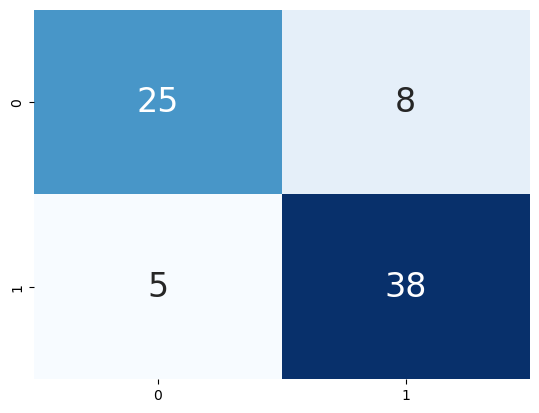

In [84]:
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# True Negatives: 25
# False Positives: 8
# False Negatives: 5
# True Positives: 38

In [85]:
# Confusion metrics for Model 2-Decision Tree:

cm_dtc = confusion_matrix(y_test,y_pred_dtc)

In [86]:
cm_dtc

array([[26,  7],
       [ 9, 34]], dtype=int64)

<Axes: >

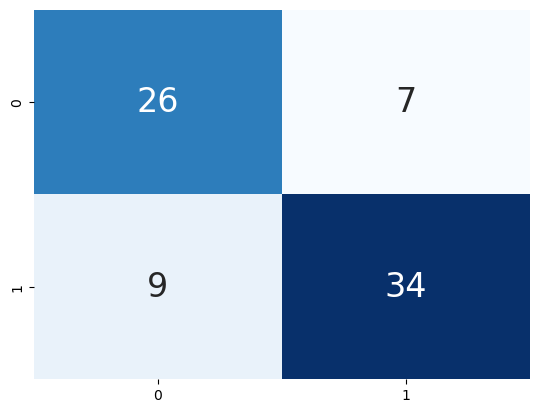

In [87]:
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# True Negatives: 21
# False Positives: 12
# False Negatives: 6
# True Positives: 37

In [88]:
# Confusion metrics for Model 3-Random Forest:

cm_rf = confusion_matrix(y_test,y_pred_rf)

In [89]:
cm_rf

array([[26,  7],
       [ 3, 40]], dtype=int64)

<Axes: >

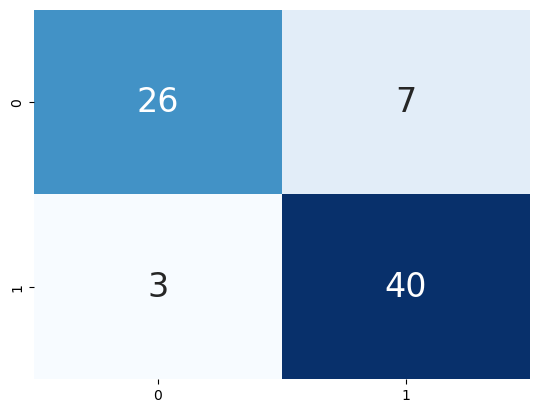

In [90]:
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# True Negatives: 26
# False Positives: 7
# False Negatives: 3
# True Positives: 40

In [91]:
# Confusion metrics for Model 4-SVM:

cm_svm = confusion_matrix(y_test,y_pred_svm)

In [92]:
cm_svm

array([[25,  8],
       [ 5, 38]], dtype=int64)

<Axes: >

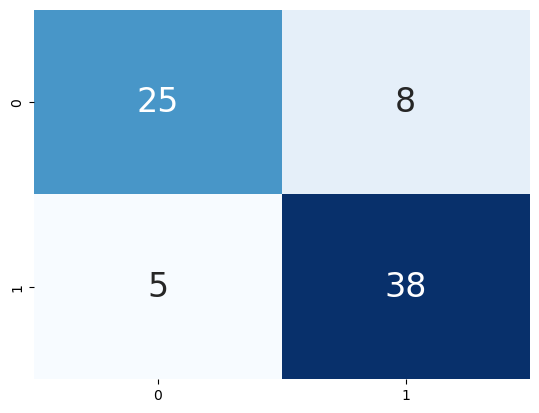

In [93]:
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# True Negatives: 25
# False Positives: 8
# False Negatives: 5
# True Positives: 38

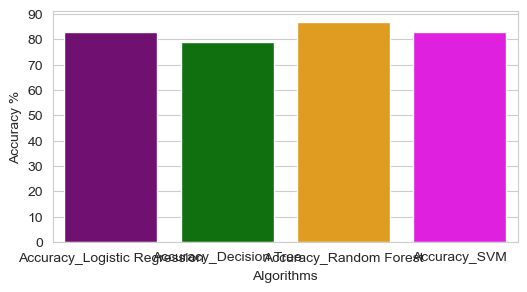

In [94]:
colors = ["purple", "green", "orange","magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(6,3))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [95]:
accuracies

{'Accuracy_Logistic Regression': 82.89473684210526,
 'Accuracy_Decision Tree': 78.94736842105263,
 'Accuracy_Random Forest': 86.8421052631579,
 'Accuracy_SVM': 82.89473684210526}